In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

In [2]:
# 그래프에 한글 사용 설정
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/NGULIM.ttf'  # 폰트가 설치되어 있는 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
import warnings
# 모든 경고 무시
warnings.filterwarnings('ignore')

In [4]:
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
# 서울시 스타벅스 매장 파일 읽기
coffee_s = pd.read_csv("starbucks_coffee.csv", index_col = 0)
coffee_s

,매장이름,주소,구,브랜드
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스
...,...,...,...,...
618,사가정역,서울특별시 중랑구 면목로 310,중랑구,스타벅스
619,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구,스타벅스
620,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구,스타벅스
621,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구,스타벅스


### 카카오 지도를 활용한 매장 위치 좌표 반환

In [8]:
import requests
from urllib.parse import urlparse
import json

In [10]:
API_KEY = '5f36b3202f6010324148bd6a01f2854e'

In [13]:
for i in coffee_s.index:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + coffee_s.loc[i, '주소']
    rest_api_key = API_KEY
    header = {'Authorization': 'KakaoAK ' + rest_api_key}
    resp = requests.get(url, headers=header)
    
    if resp.status_code == 200:
        jsondata = resp.json()
        if jsondata["meta"]["total_count"] == 0 :
            coffee_s.loc[i, '위도'] = np.nan
            coffee_s.loc[i, '경도'] = np.nan
        else :
            coffee_s.loc[i, '위도'] = jsondata["documents"][0]["address"]["y"]
            coffee_s.loc[i, '경도'] = jsondata["documents"][0]["address"]["x"]
    else:
        coffee_s.loc[i, '위도'] = "ERROR[" + str(resp.status_code) + "]"
        coffee_s.loc[i, '경도'] = "ERROR[" + str(resp.status_code) + "]"
    
coffee_s

,매장이름,주소,구,브랜드,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스,37.5011172075922,127.043058269829
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스,37.5102202255601,127.022269137849
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스,37.5139723982051,127.020611936716
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스,37.499603693833,127.031676800566
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스,37.4945603877761,127.062632515245
...,...,...,...,...,...,...
618,사가정역,서울특별시 중랑구 면목로 310,중랑구,스타벅스,37.5796360424526,127.087974659533
619,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구,스타벅스,37.5969380081251,127.086471773354
620,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구,스타벅스,37.6153331239502,127.076880465585
621,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구,스타벅스,37.6066433737247,127.106339503555


In [15]:
# 완성된 데이터프레임 저장
# .csv 파일로 저장하기 : 인덱스 무시하고 저장
coffee_s.to_csv('starbucks.csv', index = False)

In [16]:
starbucks = pd.read_csv("starbucks.csv")
starbucks

,매장이름,주소,구,브랜드,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스,37.501117,127.043058
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스,37.510220,127.022269
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스,37.513972,127.020612
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스,37.499604,127.031677
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스,37.494560,127.062633
...,...,...,...,...,...,...
618,사가정역,서울특별시 중랑구 면목로 310,중랑구,스타벅스,37.579636,127.087975
619,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구,스타벅스,37.596938,127.086472
620,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구,스타벅스,37.615333,127.076880
621,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구,스타벅스,37.606643,127.106340


In [19]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매장이름    623 non-null    object 
 1   주소      623 non-null    object 
 2   구       623 non-null    object 
 3   브랜드     623 non-null    object 
 4   위도      599 non-null    float64
 5   경도      599 non-null    float64
dtypes: float64(2), object(4)
memory usage: 29.3+ KB


In [17]:
# '구' 열의 유일한 값 찾아 개수 구하기
len(starbucks['구'].unique())

25

In [18]:
# 결측치 확인
starbucks.isnull().sum()

매장이름     0
주소       0
구        0
브랜드      0
위도      24
경도      24
dtype: int64

In [21]:
# 결측치 개수 확인
missing_values = starbucks.isnull().sum()

# 결측치가 있는 열과 그 개수 출력
print(missing_values[missing_values > 0])

위도    24
경도    24
dtype: int64


In [23]:
# 결측치가 있는 데이터만 필터링
missing_data = starbucks[starbucks.isnull().any(axis=1)]
missing_data

,매장이름,주소,구,브랜드,위도,경도
36,가로수길,"서울특별시 강남구 논현로175길 94, 1~2층 (신사동)",강남구,스타벅스,NaN,NaN
106,마곡GMG,"서울특별시 강서구 마곡중앙6로 16 (마곡동) 117,118,119,120호",강서구,스타벅스,NaN,NaN
118,강서우장산,"서울특별시 강서구 강서로 231 (화곡동, 우장산역 해링턴 타워), 116/117/...",강서구,스타벅스,NaN,NaN
120,가양역사거리,"서울특별시 강서구 화곡로 416 (등촌동) 가양더스카이벨리5차 지식산업센터 101,...",강서구,스타벅스,NaN,NaN
121,내발산,"서울특별시 강서구 강서로 323 (내발산동), 101/102호",강서구,스타벅스,NaN,NaN
122,마곡웰튼,"서울특별시 강서구 마곡중앙5로 22 (마곡동), 104/105/106호",강서구,스타벅스,NaN,NaN
147,광나루,"서울특별시 광진구 아차산로 607, 1,2층 (광장동)",광진구,스타벅스,NaN,NaN
169,독산역,"서울특별시 금천구 가산디지털1로 16 (가산동), 107-2, 1층",금천구,스타벅스,NaN,NaN
194,방학역,"서울특별시 도봉구 도봉로 684 (방학동)101,102,113,114,115호",도봉구,스타벅스,NaN,NaN
218,서강대흥역,서울특별시 마포구 백범로 89-5 (대흥동),마포구,스타벅스,NaN,NaN


In [24]:
# 결측치를 앞행의 값으로 채우기
starbucks_f = starbucks.ffill()

In [53]:
starbucks_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매장이름    623 non-null    object 
 1   주소      623 non-null    object 
 2   구       623 non-null    object 
 3   브랜드     623 non-null    object 
 4   위도      623 non-null    float64
 5   경도      623 non-null    float64
dtypes: float64(2), object(4)
memory usage: 29.3+ KB


In [64]:
starbucks_f.sample(15)

,매장이름,주소,구,브랜드,위도,경도
168,가산그레이트,"서울특별시 금천구 디지털로9길 32, 갑을그레이트밸리 1층 (가산동)",금천구,스타벅스,37.479513,126.887512
500,명동길,서울특별시 중구 명동10길 41,중구,스타벅스,37.562057,126.985873
173,가산어반워크,서울특별시 금천구 가산디지털2로 135 (가산동),금천구,스타벅스,37.480021,126.878016
242,망원한강공원,서울특별시 마포구 마포나루길 435 (망원동),마포구,스타벅스,37.554015,126.896282
229,애오개역,"서울특별시 마포구 마포대로 201, 마포트라팰리스II (아현동)",마포구,스타벅스,37.552216,126.955504
39,강남대로,"서울특별시 강남구 강남대로 456, 한석타워 2층 1-2호 (역삼동)",강남구,스타벅스,37.503137,127.025570
420,영등포시장교차로,서울특별시 영등포구 영중로 45 (영등포동6가),영등포구,스타벅스,37.520461,126.904457
302,서초역,서울특별시 서초구 반포대로 118 (서초동),서초구,스타벅스,37.490665,127.008613
311,반포원베일리,서울특별시 서초구 반포대로 291 (반포동),서초구,스타벅스,37.504902,126.999481
442,경희궁로,서울특별시 종로구 새문안로3길 15 (당주동),종로구,스타벅스,37.571706,126.972301


In [68]:
# 강남구만 추출 방법 들 ...
starbucks_f[starbucks_f['구'] == '강남구']
starbucks_f.query("구.str.contains('강남구')")

,매장이름,주소,구,브랜드,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스,37.501117,127.043058
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스,37.510220,127.022269
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스,37.513972,127.020612
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스,37.499604,127.031677
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스,37.494560,127.062633
...,...,...,...,...,...,...
88,청담역,서울특별시 강남구 삼성로 709 (청담동),강남구,스타벅스,37.519425,127.049529
89,압구정현대아파트,서울특별시 강남구 논현로175길 38 (신사동),강남구,스타벅스,37.525192,127.025552
90,강남청담빌딩,서울특별시 강남구 선릉로 704 (청담동),강남구,스타벅스,37.517802,127.041389
91,역삼이마트,서울특별시 강남구 역삼로 310 (역삼동),강남구,스타벅스,37.499236,127.048421


In [70]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

- 서울시 지도 그리기 : folium.Map()

In [113]:
# 서울 중심 좌표
seoul_center = [37.535833, 126.991558]

# 지도 생성
seoul_map = folium.Map(
    location=seoul_center,
    zoom_start=11.5,
    tiles='cartodbpositron'   
)
seoul_map

- 서울시 25개 구의 영역을 구분하세요 : folium.GeoJson()

In [93]:
from folium.plugins import MarkerCluster
import json
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

# GeoJson 레이어 추가 : 구별 영역 표시
folium.GeoJson(
    seoul_geo,
    name='address',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name'],  # GeoJSON의 속성에서 'name' 필드를 사용
        aliases=[''],  # 툴팁에서 표시할 레이블
        localize=True
    )
).add_to(seoul_map)
seoul_map

In [76]:
# 스타벅스 구별 전체 매장수 합
starbucks_count = pd.DataFrame(
    starbucks_f.groupby('구').agg({
    '위도': 'mean',
    '경도': 'mean',
    '매장이름': 'count'  # 매장 수 계산
}))
# 매장이름 컬럼을 매장수로 변경
starbucks_count.rename(columns={'매장이름': '매장수'}, inplace=True)
starbucks_count 

,위도,경도,매장수
구,,,
강남구,37.506503,127.046763,93
강동구,37.542994,127.140445,18
강북구,37.633758,127.023270,7
강서구,37.555133,126.842626,28
관악구,37.481437,126.946077,12
광진구,37.545534,127.079400,19
구로구,37.494845,126.879572,15
금천구,37.474470,126.888256,15
노원구,37.640241,127.064755,15


In [77]:
starbucks_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   위도      25 non-null     float64
 1   경도      25 non-null     float64
 2   매장수     25 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 800.0+ bytes


In [78]:
# CircleMarker의 radius 지정시 타입 오류가 발생하므로  ''매장수'의 float 타입으로 변경
starbucks_count['매장수'] = starbucks_count['매장수'].astype(float)
starbucks_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   위도      25 non-null     float64
 1   경도      25 non-null     float64
 2   매장수     25 non-null     float64
dtypes: float64(3)
memory usage: 800.0+ bytes


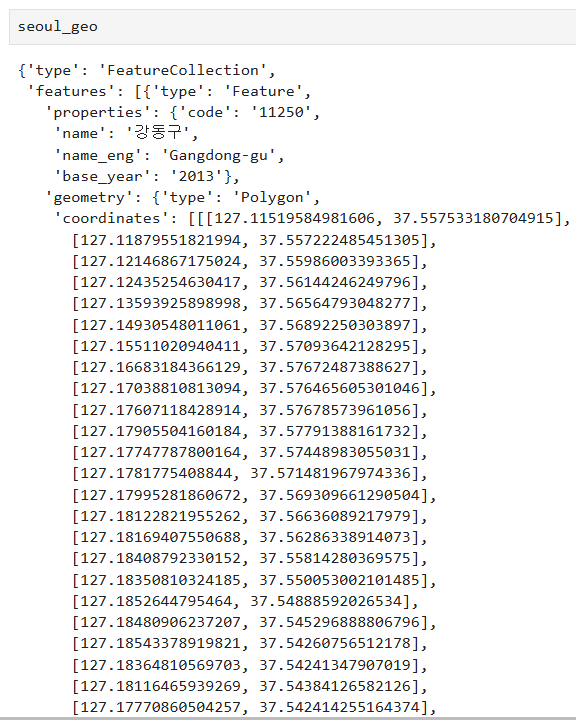

- 서울시 스타벅스 구의 매장수에 따른 영역 색상 구분하기 : folium.Choropleth()

In [108]:
# Choropleth 레이어 추가
choropleth = folium.Choropleth(
    geo_data=seoul_geo,   
    name='choropleth',
    data=starbucks_count['매장수'],
    columns=[starbucks_count.index, starbucks_count['매장수']], 
    key_on='feature.properties.name',  # GeoJSON의 속성
    fill_color='Reds', #YlOrRd
    fill_opacity=0.5,
    line_opacity=0.3
).add_to(seoul_map)
seoul_map

- 서울시 스타벅스의 매장을 folium.features.CircleMarker()로 표시하세요

In [110]:
# 서울 중심 좌표
seoul_center = [37.535833, 126.991558]

# 지도 생성
seoul_map = folium.Map(
    location=seoul_center,
    zoom_start=11.5,
    tiles='cartodbpositron'   
)

for lat, long in zip(starbucks_f['위도'], starbucks_f['경도']):
    folium.Circle([lat, long],radius = 100, color='green').add_to(seoul_map)

seoul_map

- 서울시 25개 구의 영역을 구분하고, 스타벅스 매장을 표시하세요

In [120]:
# 서울 중심 좌표
seoul_center = [37.535833, 126.991558]

# 지도 생성
seoul_map = folium.Map(
    location=seoul_center,
    zoom_start=11.5,
    tiles='cartodbpositron'   
)

from folium.plugins import MarkerCluster
import json
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

# GeoJson 레이어 추가 : 구별 영역 표시
folium.GeoJson(
    seoul_geo,
    name='address',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name'],  # GeoJSON의 속성에서 'name' 필드를 사용
        aliases=[''],  # 툴팁에서 표시할 레이블
        localize=True
    )
).add_to(seoul_map)

for lat, long in zip(starbucks_f['위도'], starbucks_f['경도']):
    folium.Circle([lat, long],radius = 100, color='green').add_to(seoul_map)

seoul_map

- 서울시 25개 구에 스타벅스 매장수에 따른 영역 색상 구분하고, 스타벅스 매장을 표시하세요

In [130]:
from folium.plugins import MarkerCluster
import json

# 서울 중심 좌표
seoul_center = [37.535833, 126.991558]

# 지도 생성
seoul_map = folium.Map(
    location=seoul_center,
    zoom_start=11.5,
    tiles='cartodbpositron'   
)

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

# GeoJson 레이어 추가 : 구별 영역 표시
folium.GeoJson(
    seoul_geo,
    name='address',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name'],  # GeoJSON의 속성에서 'name' 필드를 사용
        aliases=[''],  # 툴팁에서 표시할 레이블
        localize=True
    )
).add_to(seoul_map)

# Choropleth 레이어 추가
choropleth = folium.Choropleth(
    geo_data=seoul_geo,   
    name='choropleth',
    data=starbucks_count['매장수'],
    columns=[starbucks_count.index, starbucks_count['매장수']], 
    key_on='feature.properties.name',  # GeoJSON의 속성
    fill_color='Blues', #YlOrRd
    fill_opacity=0.5,
    line_opacity=0.3
).add_to(seoul_map)

for lat, long in zip(starbucks_f['위도'], starbucks_f['경도']):
    folium.Circle([lat, long],radius = 100, color='green').add_to(seoul_map)

seoul_map

In [115]:
starbucks_count.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구')

- 서울시 25개 구의 스타벅스 매장수를 반지름으로 지정하는 folium.features.CircleMarker() 를 표시하세요

In [129]:
import folium.features
from folium.plugins import MarkerCluster
import json

# 서울 중심 좌표
seoul_center = [37.535833, 126.991558]

# 지도 생성
seoul_map = folium.Map(
    location=seoul_center,
    zoom_start=11.5,
    tiles='cartodbpositron'   
)

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

# GeoJson 레이어 추가 : 구별 영역 표시
folium.GeoJson(
    seoul_geo,
    name='address',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name'],  # GeoJSON의 속성에서 'name' 필드를 사용
        aliases=[''],  # 툴팁에서 표시할 레이블
        localize=True
    )
).add_to(seoul_map)

for lat, long, t in zip(starbucks_count['위도'], starbucks_count['경도'], starbucks_count['매장수']):
    folium.features.CircleMarker([lat, long],radius = t, color='green').add_to(seoul_map)

seoul_map

- 서울 전체 인구 데이터를 불러오기
    - '남자', '여자' 컬럼 제거
    - 컬럼명 변경 : '소계' -> '인구수'로 변경

In [144]:
seoul_ingu = pd.read_csv('../03_data-readwrite/seoul_total.csv', index_col = 0)
# '남자'와 '여자' 컬럼 삭제
seoul_ingu = seoul_ingu.drop(columns=['남자', '여자'])
# '소계' 컬럼명을 '인구수'로 변경
seoul_ingu.rename(columns={'소계': '인구수'}, inplace=True)
seoul_ingu

,인구수
구,
종로구,150011
중구,131589
용산구,218370
성동구,282385
광진구,349307
동대문구,359219
중랑구,386131
성북구,435492
강북구,289678


In [145]:
starbucks_count.sample(5)

,위도,경도,매장수
구,,,
동대문구,37.581338,127.052825,13.0
용산구,37.536838,126.976633,24.0
동작구,37.497079,126.953771,11.0
성북구,37.596317,127.024706,16.0
서대문구,37.565467,126.941473,21.0


- seoul_ingu와 starbucks_count 데이터프레임의 데이터를 '구'를 키로 하여 병합한다

In [146]:
# '구'를 키로 하여 병합
seoul_starucks_ingu = pd.merge(seoul_ingu, starbucks_count, on='구', how='outer')
seoul_starucks_ingu

,인구수,위도,경도,매장수
구,,,,
강남구,564280,37.506503,127.046763,93.0
강동구,469464,37.542994,127.140445,18.0
강북구,289678,37.633758,127.023270,7.0
강서구,563515,37.555133,126.842626,28.0
관악구,496469,37.481437,126.946077,12.0
광진구,349307,37.545534,127.079400,19.0
구로구,412441,37.494845,126.879572,15.0
금천구,239577,37.474470,126.888256,15.0
노원구,498358,37.640241,127.064755,15.0


In [147]:
len(seoul_starucks_ingu.index)

25

In [148]:
seoul_starucks_ingu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   인구수     25 non-null     int64  
 1   위도      25 non-null     float64
 2   경도      25 non-null     float64
 3   매장수     25 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1000.0+ bytes


In [149]:
# CircleMarker의 radius 지정시 타입 오류가 발생하므로  ''매장수'의 float 타입으로 변경
seoul_starucks_ingu['인구수'] = seoul_starucks_ingu['인구수'].astype(float)
seoul_starucks_ingu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   인구수     25 non-null     float64
 1   위도      25 non-null     float64
 2   경도      25 non-null     float64
 3   매장수     25 non-null     float64
dtypes: float64(4)
memory usage: 1000.0+ bytes


In [150]:
# 전체 인구수의 합 계산
seoul_starucks_ingu.인구수.sum()

9605419.0

In [151]:
# 전체 매장수의 합 계산
seoul_starucks_ingu.매장수.sum()

623.0

- 인구비율과 매장비율을 구한다

In [152]:
seoul_starucks_ingu['인구비율'] = ((seoul_starucks_ingu['인구수']/seoul_starucks_ingu['인구수'].sum())*100).round(2)
seoul_starucks_ingu

,인구수,위도,경도,매장수,인구비율
구,,,,,
강남구,564280.0,37.506503,127.046763,93.0,5.87
강동구,469464.0,37.542994,127.140445,18.0,4.89
강북구,289678.0,37.633758,127.023270,7.0,3.02
강서구,563515.0,37.555133,126.842626,28.0,5.87
관악구,496469.0,37.481437,126.946077,12.0,5.17
광진구,349307.0,37.545534,127.079400,19.0,3.64
구로구,412441.0,37.494845,126.879572,15.0,4.29
금천구,239577.0,37.474470,126.888256,15.0,2.49
노원구,498358.0,37.640241,127.064755,15.0,5.19


In [153]:
seoul_starucks_ingu['매장비율'] = ((seoul_starucks_ingu['매장수']/seoul_starucks_ingu['매장수'].sum())*100).round(2)
seoul_starucks_ingu

,인구수,위도,경도,매장수,인구비율,매장비율
구,,,,,,
강남구,564280.0,37.506503,127.046763,93.0,5.87,14.93
강동구,469464.0,37.542994,127.140445,18.0,4.89,2.89
강북구,289678.0,37.633758,127.023270,7.0,3.02,1.12
강서구,563515.0,37.555133,126.842626,28.0,5.87,4.49
관악구,496469.0,37.481437,126.946077,12.0,5.17,1.93
광진구,349307.0,37.545534,127.079400,19.0,3.64,3.05
구로구,412441.0,37.494845,126.879572,15.0,4.29,2.41
금천구,239577.0,37.474470,126.888256,15.0,2.49,2.41
노원구,498358.0,37.640241,127.064755,15.0,5.19,2.41


In [164]:
seoul_starucks_ingu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   인구수     25 non-null     float64
 1   위도      25 non-null     float64
 2   경도      25 non-null     float64
 3   매장수     25 non-null     float64
 4   인구비율    25 non-null     float64
 5   매장비율    25 non-null     float64
dtypes: float64(6)
memory usage: 1.9+ KB


#### 서울시 구별 인구수와 스타벅스 매장의 인과 관계 지도 시각화

In [ ]:
# 주황색 원 : 인구비율, 녹색 원 : 매장비율


In [187]:
import folium.features
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

from folium.plugins import MarkerCluster
import json

# 서울 중심 좌표
seoul_center = [37.535833, 126.991558]

# 지도 생성
seoul_map = folium.Map(location = seoul_center, zoom_start = 11.5, tiles = 'cartodbpositron')

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

# GeoJson 레이어 추가 : 구별 영역 표시
folium.GeoJson(seoul_geo, 
               name = 'address', 
               tooltip = folium.features.GeoJsonTooltip(
                   fields = ['name'],
                   aliases = [''],
                   localize = True
)).add_to(seoul_map)

# Choropleth 레이어 추가
choropleth = folium.Choropleth(
            geo_data = seoul_geo,
            name = 'choropleth',
            data = seoul_starucks_ingu['매장수'],
            columns = [seoul_starucks_ingu.index, seoul_starucks_ingu['매장수']],
            key_on = 'feature.properties.name',
            fill_color = 'Blues',
            fill_opacity = 0.5,
            line_opacity = 0.3).add_to(seoul_map)

# 매장 표시
for index, rows in seoul_starucks_ingu.iterrows():
    folium.features.CircleMarker(
        location = [rows['위도'], rows['경도']],
        radius = rows['매장비율'] * 5,
        color = 'darkgreen',
        fill = True,
        fill_color = "darkgreen",
        tooltip = f"{index} 매장비율 : {rows['매장비율']}"
    ).add_to(seoul_map)

# 인구수 표시
for index, rows in seoul_starucks_ingu.iterrows():
    folium.features.CircleMarker(
        location = [rows['위도'], rows['경도']],
        radius = rows['인구비율'] * 5,
        color = 'yellow',
        fill = True,
        fill_color = "yellow",
        tooltip = f"{index} 인구비율 : {rows['인구비율']}"
    ).add_to(seoul_map)

seoul_map